# TP 1 : Introduction à Python en passant par les EDO

L'objectif du TP est de vous apprendre ou rappeler les rudiments du langage python indispensable pour illustrer le cours de "méthodes numériques pour les EDO". Vous pouvez vous référer au matériel pédagogique dans l'UE Moodle 3M100 ou bien directement aux ressources internet, en sélectionnant les sites "officiels" plutôt que les forums.


Plutôt que de repartir de 0 nous allons nous concentrer sur les outils dont nous avons besoin pour :
<ol>
<li> Définir une fonction python 
<li> Définir des tableaux de nombres contenant les solutions des ODE  (librairie numpy)
<li> Afficher ces solutions graphiquement (graphes et portraits de phase) (librairie matplotlib)
<li> Faire des opérations d'algèbre linéaire sur des matrices et des vecteurs (librairie scipy.linalg)
<li> Calculer des approximations numériques de la solution d'une ODE (librairie scipy.integrate)
</ol>

In [10]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
%matplotlib inline    
# ouvre les fenetres graphiques dans le notebook


## Exercice 1.  L'oscillateur harmonique simple

Soit $\omega_0 > 0$. Commençons avec $\omega_0= 1$. On considère l’équation différentielle de l’oscillateur harmonique :
$$x''(t) + \omega_0^2 x(t) = 0$$
muni des conditions initiales
$$\left\{\begin{array}{l}
x(0) = x_0\\
x'(0) = v_0
\end{array}\right.$$
Cette équation est fondamentale. Elle est à la base de la modélisation de nombreux phénomènes physiques
<ol><Li>
en mécanique : $x(t)$ est le déplacement d’une masse m suspendue à un ressort de constante de raideur
$k$ tel que $\omega_0^2=k/m$
<li> $x(t)$ peut aussi mesurer les petites oscillations (en radians, autour de la position
d’équilibre stable verticale) d’un pendule de longueur $L$, avec $\omega_0 =
\sqrt{g/L}$
avec  $g$ la constante de
pesanteur.
<li> en électronique : $x(t)$ est la charge aux bornes d’un condensateur de capacité $C$ qui se décharge dans
une bobine d’inductance $L$ avec $\omega_0=1/\sqrt{LC}$.</ol>


### Question 1 Définir une fonction

Voici ci-dessous une exemple de fonction en Python

In [11]:
def exemple(x):
# le caractere # indique que ce qui suit est un commentaire
# En python une fonction comprend une premiere ligne declarative avec le nom de la fonction (ici "exemple") suivi des arguments entre parenthèses, terminée par ":""" 
# à l'interieur d'un bloc fonction, toutes les commandes doivent etre indentees.
    y=x+1   # Cette fonction va programmer en python y=f(x)=x+1 
    return y  # le mot reserve "return" permet de communiquer les resultats de la fonction a l'exterieur du bloc 
#Maintenant on va utiliser la fonction. On arrete l'indentation
t=3
z=exemple(t)
print ("exemple(",t,')=',z)

exemple( 3 )= 4


On a vu en cours et en TD qu'on peut trouver $a$ et $b$, tels que la fonction $x(t)=a \cos( \omega_0 t ) + b \sin(\omega_0 t)$ soit solution du problème ci-dessus 
$$ a= x_0\quad b= v_0/\omega_0$$
Ecrire  une fonction "oscille", qui prend en entrée les valeurs initiales, la valeur de $\omega_0$, et un temps $t$ et qui calcule la solution. Testez-la avec $x_0 = 2$ et $v_0 = 3$. 

In [12]:
print ("À vous de jouer ci-dessous pour répondre à la question 1")

À vous de jouer ci-dessous pour répondre à la question 1


In [13]:
def oscille(x0,v0,w0,t):
    return x0*math.cos(w0*t)+v0*math.sin(w0*t)/w0
x0=2
v0=3
w0=1
t=1
print(oscille(x0,v0,w0,t))

3.605017566159969


### Question 2 - Discrétiser un intervalle 

##### On veut maintenant calculer les valeurs de la solution sur un intervalle donné, en discrétisant cet intervalle suffisamment finement pour que l'affichage graphique des valeurs de la fonction aux points discrétisé ait un aspect "continu". Plusieurs façons de dicrétiser un intervalle sont possibles en python. En voici trois (il y en a d'autres) :

In [14]:
absc0 = [1+ float(k)/10  for k in  range (10)]    
print (absc0)
absc1 = np.arange (1,2,0.1)
print (absc1)
absc2 = np.linspace (1,2,10)
print (absc2)

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]


Assurez-vous que vous comprenez bien les trois méthodes. Que font les instructions "range", "np.arange" , "np.linspace" ? Que se passe-t-il si on n'utilise pas "float" pour définir absc0 ?


Votre réponse : 

Ecrire une fonction $oscillateur(t_,x_0,v_0,\omega_0)$ qui calcule deux tableaux $x(t)$ et
$v(t)$, où $v(t)=x'(t)$, à partir des conditions initiales et d’un tableau de valeurs de temps $t = (t_i)_{i=1,\ldots,n}$. Tester pour
$t_k=6k\pi/(\omega_0 n)$, avec $n=10$ puis $n=100$.

In [15]:
print ("a vous de jouer ci-dessous pour repondre a la question 2")

a vous de jouer ci-dessous pour repondre a la question 2


### Question 3 - Tracer une courbe


"Tracer une courbe" sur un ordinateur, c'est-à-dire par exemple le graphe d'une fonction $y=x(t)$, c'est en fait une succession d'opérations
<UL> <li> Définir l'intervalle $[t_0,T]$ sur lequel on veut calculer la fonction
<li> Choisir une discrétisation suffisamment fine de cet intervalle et calculer les valeurs de la fonction en ces points (voir exercice 2)
<lI> Tracer la ligne brisée reliant les points $(t_i,x(t_i))_{i=1,\ldots,N}$ avec la fonction plot de la librairie graphique matplotlib
<li> Rajouter une légende, le nom des axes, etc, tout ce qui peut rendre la figure compréhensible donc intéressante
</UL>
Un exemple où on trace la fonction $y=sin(t)$ pour $t\in[0,\pi]$ en utilisant la discrétisation absc2

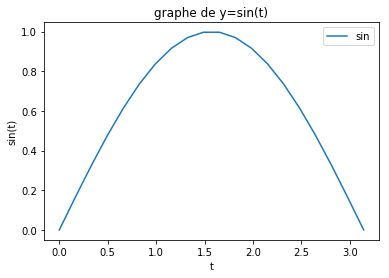

In [16]:
absc2 = np.linspace (0,math.pi,20)
ord2=np.sin(absc2)
plt.plot(absc2,ord2)               #trace la courbe
plt.title('graphe de y=sin(t)')    # affiche un titre
plt.legend(['sin'])                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('sin(t)')
plt.show()                         # fait apparaitre la figure


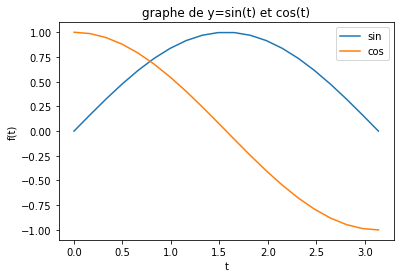

In [17]:
# on veut rajouter une autre courbe:
ord3=np.cos(absc2)
plt.plot(absc2,ord2,absc2,ord3)               #trace la courbe
plt.title('graphe de y=sin(t) et cos(t)')    # affiche un titre
plt.legend(['sin','cos'])                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('f(t)')
plt.show()                         # fait apparaitre la figure



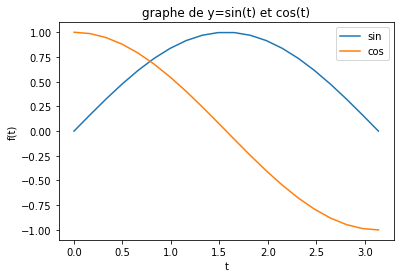

In [18]:
plt.plot(absc2,ord2,label="sin")               #trace la courbe
# c'est possible de ne pas tracer les deux courbes dans la meme commande
plt.plot(absc2,ord3,label="cos")               #trace la courbe
plt.title('graphe de y=sin(t) et cos(t)')    # affiche un titre
plt.legend()                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('f(t)')
plt.show()                         # fait apparaitre la figure


Tracer sur le même graphique $x(t)$ et $v(t)$ en fonction de $t\in[0,T]$ et sur un autre graphique la trajectoire $(x(t),v(t))$ pour $t\in[0,T]$.
On choisira $n$ suffisamment grand pour que les courbes  aient un aspect "continu".


In [19]:
#A vous de jouer ci-dessous :

Testez en affichant les trajectoires pour différentes valeurs de x0, et v0 sur le même graphique.
